**Supermarket sales**

Historical record of sales data in 3 different supermarkets

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

**Attribute information**

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

**Packages**

1. “matplotlib” and “seaborn” for the plots

2. “pandas” for the dataset management, and

3. “sklearn” for the Linear Regression algorithm.

**Sklearn**

To import “train_test_split” for the training set and test set split

**Data Normalization & Evaluation**

“MinMaxScaler” for data normalization, and “r2_score” for the evaluation.

In [ ]:
# Importing Packages

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [ ]:
# Import the dataset
df = pd.read_csv("supermarket_sales.csv")

In [ ]:
# To display first 5 rows in dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Extracting the numerical features
# Linear Regression, like many other ML algorithms, can only use numerical features, so to make this dataset usable, we have to remove all the other features.

numerical_feature = [feature for feature in df.columns if df[feature].dtypes!="O"]
numerical_feature

['Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

**Plots of car features vs price**

we can visualize the remaining features and their correlations with the price thanks to matplotlib and seaborn.

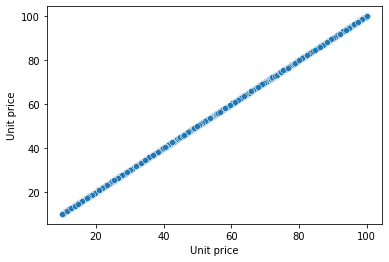

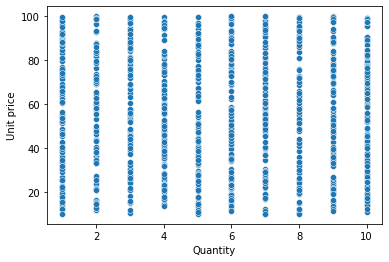

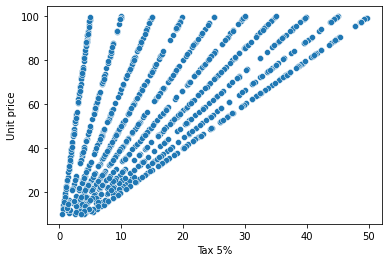

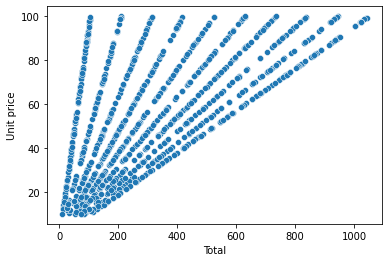

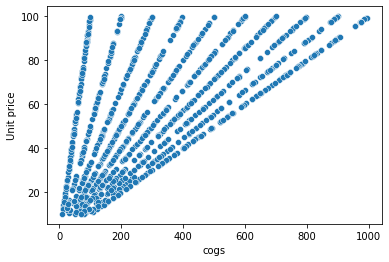

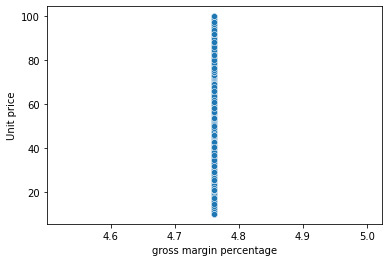

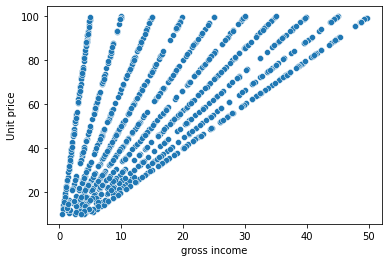

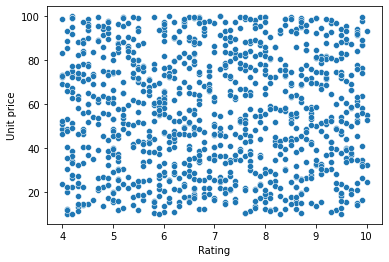

In [ ]:
# Creating the plots for data visualization
for feature in numerical_feature:
    sns.scatterplot(x = df[feature], y = df['Unit price'])
    plt.show()

**Dropping useless columns**

In [ ]:
# Dropping useless columns
df = df.drop(['Invoice ID','Branch','City', 'Customer type', 'Gender', 'Product line','Date','Payment','Time'], axis=1)

**Data normalization**

This step is very important because here we can use a unique measure for each numerical data.

https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/normalize-data

Normalization avoids these problems by creating new values that maintain the general distribution and ratios in the source data, while keeping values within a scale applied across all numeric columns used in the model.

This module offers several options for transforming numeric data:

You can change all values to a 0-1 scale, or transform the values by representing them as percentile ranks rather than absolute values.

You can apply normalization to a single column, or to multiple columns in the same dataset.

If you need to repeat the experiment, or apply the same normalization steps to other data, you can save the steps as a normalization transform, and apply it to other datasets that have the same schema.

In [ ]:
df['Quantity'] = np.log(df['Quantity'])

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df)
dataset=pd.DataFrame(scaler.transform(df),columns=df.columns)
dataset.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,0.718847,0.845098,0.521616,0.521616,0.521616,0.0,0.521616,0.850000
1,0.057855,0.698970,0.067387,0.067387,0.067387,0.0,0.067387,0.933333
2,0.403316,0.845098,0.319628,0.319628,0.319628,0.0,0.319628,0.566667
3,0.535603,0.903090,0.463549,0.463549,0.463549,0.0,0.463549,0.733333
4,0.848131,0.845098,0.604377,0.604377,0.604377,0.0,0.604377,0.216667


In [ ]:
df = pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])
df

,Number of missing values
Unit price,0
Quantity,0
Tax 5%,0
Total,0
cogs,0
gross margin percentage,0
gross income,0
Rating,0


**Training set and test set split**

Here, we have to divide the dataset into a training set and test set. To do this we have to distinguish the value that the algorithm should guess (y) and the values that should be given to the algorithm (X).

After this, we will use the “train_test_split” method of the sklearn library to easily create the training set and the test set.

In [ ]:
X=df.drop(['Unit price'], axis=1)
y=df['Unit price']

In [ ]:
# 10% of the dataset as a test set.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

**Model creation and training**

The model training! Here, we create the linear regression model with our training set.

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predLR = lr.predict(X_test)

**Model evaluation**

To define the accuracy of our model we can use the most popular metric for linear regression called “R-squared”, the closer the value is to 1, the more accurate the model is

In [ ]:
r2_score(y_test, y_predLR)

0.7983428884241082